### 위상정렬
- 비순환 방향 그래프(DAG)에 대해 정점을 선형으로 정렬하는 것.
  - 모든 간선 (u,v)에 대해 u가 v보다 먼저 오는 순서로 정렬된다.
- DAG가 아닌 그래프에 대해선 위상정렬을 할 수 없다.
  - 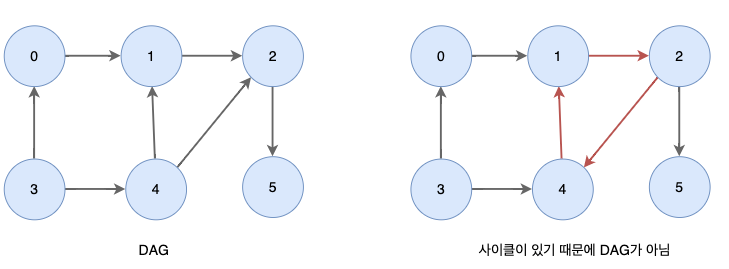
  - 사이클이 있는경우 (u,v)가 먼저오는지 (v,u)가 먼저오는지 알 수 없기 때문이다.
- 위상정렬은 여러가지 답이 존재할 수 있다.
- 이를 응용하여 컴파일 작업 순서 결정, git등의 버전 히스토리 관리, 교착상태 탐지 등을 할 수 있다.
  - 전후/우열 관계 등이 주워진 작업들을 위상정렬하면 순서를 정할 수 있다.



### DFS 구현
- `vis`, `T`: 위상정렬 stack
1. 그래프에서 방문하지 않은 정점 `u`을 선택하여 모든 정점을 방문할 때까지 다음 재귀함수 `R(u)`를 호출한다.
    1. 현재 방문한 정점 `u`를 방문한 것으로 처리한다.
    2. `u`에 인접한 정점들 중 방문하지 않은 모든 정점들 `v`에 대해
        1. `v`를 방문한 것으로 처리한다.
        2. `R(v)`를 호출한다.
    3. `u`를 `T`에 push한다. 
2. `T`를 출력한다.       

In [ ]:
def toposort(G): #0-index
  res, vis = [], [False] * len(G) #그래프의 방문하지 않는 모든 정점들을 DFS로 방문하는 구현
  stack = [*range(len(G))] 
  while stack:
    node = stack.pop()
    if node < 0: #음수이다 = DFS를 하면서 추가된 정점 번호이다 = 처음에 stack에 추가했던 정점이 아니다.
      res.append(~node) #bitwise not(-x-1), 이미 not된 값을 다시 not한 것이므로 원래 값을 집어넣는다.
    elif not vis[node]: #처음에 stack에 추가했던 정점을 방문하지 않은 경우
      vis[node] = True
      stack.append(~node) #현재 노드의 not값
      stack += G[node] # 인접한 정점 추가

  # cycle check
  for node in res:
    if any(vis[nei] for nei in G[node]):
      return None
    vis[node] = False #2번 이상 vis를 방문하는 것이므로 사이클

  return res[::-1]

In [ ]:
N, M = map(int, input().split())
G = [[] for _ in range(N)]
for _ in range(M):
  u, v = map(int, input().split())
  G[u-1].append(v-1)

def topo(G):
  res, vis = [], [False] * len(G)
  S = [*range(len(G))] 
  while S:
    V = S.pop()
    if V < 0:
      res.append(~V)
    elif not vis[V]:
      vis[V] = True
      S.append(~V)
      S += G[V]

  for V in res:
    if any(vis[nei] for nei in G[V]):
      return None
    vis[V] = False

  return res[::-1]


### BFS 구현 (Kahn's algorithm)
- `vis`, `Q`: queue, `IN`: 진입차수, `T`: 위상정렬 list
0. 진입 차수를 저장하는 배열을 만든다.
    - `IN[i]: 정점 i로 들어오는 정점의 개수`
1. 진입 차수가 0인 정점을 큐에 삽입한다.
2. `IN[i]` = `vis[i]`를 방문한 것으로 처리하고 i를 `Q`에 enqueue한다.
3. queue가 빌 때까지 다음을 반복한다.
    1. dequeue한 정점 `t`을 `T`에 추가한다.
    2. `t`에 인접한 정점 중 방문하지 않은 모든 정점들 `u`에 대해
        1. `IN[u]`를 1 감소시킨다.
        2. `IN[u]`가 0이 되면 `Q`에 enqueue한다.
4. `T`를 출력한다.
- 이때 `Q`를 heap으로 다루면 사전순으로 정렬된 순서를 반환할 수 있다.

In [ ]:
N, M = map(int, input().split())
G = [[] for _ in range(N)]
for _ in range(M):
  u, v = map(int, input().split())
  G[u-1].append(v-1)

def kahn(graph):
  n = len(graph)

  indeg, idx = [0] * n, [0] * n
  for i in range(n):
    for e in graph[i]:
      indeg[e] += 1

  q, res = [], []
  for i in range(n):
    if indeg[i] == 0:
      q.append(i)

  nr = 0
  while q:
    res.append(q.pop())
    idx[res[-1]], nr = nr, nr + 1
    for e in graph[res[-1]]:
      indeg[e] -= 1
      if indeg[e] == 0:
        q.append(e)

  return res, idx, nr == n

- 인접한 정점을 사전순으로 찾아야 할 경우 사용

In [ ]:
from heapq import heappop, heappush

def kahn(G):
  n = len(G)

  IN, idx = [0] * n, [0] * n
  for i in range(n):
    for e in G[i]:
      IN[e] += 1

  q, res = [], []
  for i in range(n):
    if IN[i] == 0:
      heappush(q, i)

  nr = 0
  while q:
    res.append(heappop(q))
    idx[res[-1]], nr = nr, nr + 1
    for e in G[res[-1]]:
      IN[e] -= 1
      if IN[e] == 0:
        heappush(q, e)

  return res, idx, nr == n